<a href="https://colab.research.google.com/github/larubiano0/Parcial1-He2AI/blob/main/script_stock_market_variation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
! pip install datasets

In [31]:
from datasets import load_dataset
ds = load_dataset("pmoe7/SP_500_Stocks_Data-ratios_news_price_10_yrs", data_files="sp500_daily_ratios_20yrs.zip")
df = ds['train'].to_pandas()

Repo card metadata block was not found. Setting CardData to empty.


In [32]:
# 1. Examinamos la información básica del DataFrame
print("\n=== Información del DataFrame ===")
print(df.info())

# 2. Verificamos los tipos de datos y valores únicos para cada columna
print("\n=== Valores únicos por columna ===")
for column in df.columns:
    print(f"\n{column}:")
    print(f"Tipo de dato: {df[column].dtype}")
    print(f"Valores únicos: {df[column].nunique()}")
    print(f"Primeros valores únicos: {sorted(df[column].unique())[:5]}")

# 3. Verificamos valores nulos
print("\n=== Valores nulos ===")
print(df.isnull().sum())

# 4. Estadísticas descriptivas básicas
print("\n=== Estadísticas descriptivas ===")
print(df.describe())

df



=== Información del DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Ticker                     1048575 non-null  object 
 1   Date                       1048575 non-null  object 
 2   Open                       1048575 non-null  float64
 3   Close                      1048575 non-null  float64
 4   Volume                     1048575 non-null  int64  
 5   quarter                    1048575 non-null  int64  
 6   year                       1048575 non-null  int64  
 7   Asset Turnover             1048575 non-null  float64
 8   Current Ratio              1048575 non-null  float64
 9   Days Sales In Receivables  1048575 non-null  float64
 10  Debt/Equity Ratio          1048575 non-null  float64
 11  EBIT Margin                1048575 non-null  float64
 12  EBITDA Margin              1048575 

,Ticker,Date,Open,Close,Volume,quarter,year,Asset Turnover,Current Ratio,Days Sales In Receivables,...,Gross Margin,Inventory Turnover Ratio,Long-term Debt / Capital,Net Profit Margin,Operating Margin,Pre-Tax Profit Margin,ROA - Return On Assets,ROE - Return On Equity,Receiveable Turnover,Return On Tangible Equity
0,A,2005-04-01,13.88,13.67,4717800,2,2005,0.1758,2.7269,67.8873,...,50.0783,0.6660,0.2291,7.4335,3.2864,4.4601,0.7292,1.3699,1.3257,1.5538
1,A,2005-04-04,13.59,13.26,6827100,2,2005,0.1758,2.7269,67.8873,...,50.0783,0.6660,0.2291,7.4335,3.2864,4.4601,0.7292,1.3699,1.3257,1.5538
2,A,2005-04-05,13.29,13.23,5839100,2,2005,0.1758,2.7269,67.8873,...,50.0783,0.6660,0.2291,7.4335,3.2864,4.4601,0.7292,1.3699,1.3257,1.5538
3,A,2005-04-06,13.23,13.42,2994600,2,2005,0.1758,2.7269,67.8873,...,50.0783,0.6660,0.2291,7.4335,3.2864,4.4601,0.7292,1.3699,1.3257,1.5538
4,A,2005-04-07,13.38,13.37,4072300,2,2005,0.1758,2.7269,67.8873,...,50.0783,0.6660,0.2291,7.4335,3.2864,4.4601,0.7292,1.3699,1.3257,1.5538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,NI,2018-12-26,23.46,23.57,2903600,4,2018,0.0670,0.5092,70.6171,...,65.6838,1.1872,0.5527,-1.3546,-5.3636,-11.3156,NaN,-0.2402,1.2745,-0.3047
1048571,NI,2018-12-27,23.57,23.82,2842500,4,2018,0.0670,0.5092,70.6171,...,65.6838,1.1872,0.5527,-1.3546,-5.3636,-11.3156,NaN,-0.2402,1.2745,-0.3047
1048572,NI,2018-12-28,23.88,23.96,2023900,4,2018,0.0670,0.5092,70.6171,...,65.6838,1.1872,0.5527,-1.3546,-5.3636,-11.3156,NaN,-0.2402,1.2745,-0.3047
1048573,NI,2018-12-31,23.95,23.84,3537500,4,2018,0.0670,0.5092,70.6171,...,65.6838,1.1872,0.5527,-1.3546,-5.3636,-11.3156,NaN,-0.2402,1.2745,-0.3047


In [37]:

df = df[df['Ticker'] == 'AAPL'][['Date','Close', 'quarter']]
df


,Date,Close,quarter
10265,2005-04-01,1.25,2
10266,2005-04-04,1.26,2
10267,2005-04-05,1.28,2
10268,2005-04-06,1.29,2
10269,2005-04-07,1.33,2
...,...,...,...
13723,2020-09-24,108.03,3
13724,2020-09-25,112.09,3
13725,2020-09-28,114.76,3
13726,2020-09-29,113.89,3


In [46]:
import pandas as pd
import numpy as np

# =============================================================================
# 1. CONVERT 'Date' TO DATETIME AND SORT THE DATAFRAME
# =============================================================================
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True)
print("Converted 'Date' to datetime and sorted by 'Date'.")

# =============================================================================
# 2. IMPUTATION OF MISSING VALUES USING INTERPOLATION
# =============================================================================
# Interpolate numeric columns to fill missing values (if any)
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].interpolate(method='linear', limit_direction='both')
print("Interpolated numeric columns.")

# =============================================================================
# 3. REDUCE NOISE IN THE 'Close' COLUMN USING A MOVING AVERAGE
# =============================================================================
# Create a denoised version of 'Close' using a rolling window of 5 days
df['Close_denoised'] = df['Close'].rolling(window=5, min_periods=1).mean()
print("Created 'Close_denoised' via a 5-day rolling mean of 'Close'.")

# =============================================================================
# 4. DETECT OUTLIERS IN THE 'Close_denoised' COLUMN
# =============================================================================
# Using a rolling window of 20 days to calculate mean and std, then flag outliers
df['rolling_mean'] = df['Close_denoised'].rolling(window=20, min_periods=1).mean()
df['rolling_std'] = df['Close_denoised'].rolling(window=20, min_periods=1).std()

# Mark points as outliers if they deviate more than 3 * rolling_std from rolling_mean
df['is_outlier'] = (
    np.abs(df['Close_denoised'] - df['rolling_mean']) > 3 * df['rolling_std']
)
print("Detected outliers in 'Close_denoised' using a 20-day rolling mean/std and threshold=3.")

# (Optional) Uncomment to remove outliers
# df = df[df['is_outlier'] == False].reset_index(drop=True)
# print("Removed outliers from the DataFrame.")

# =============================================================================
# 5. CREATE LAG FEATURES FOR 'Close_denoised'
# =============================================================================
# Generate 40 lag columns: 'Close_denoised_lag_1' ... 'Close_denoised_lag_40'
for i in range(1, 41):
    df[f'Close_denoised_lag_{i}'] = df['Close_denoised'].shift(i)
print("Created lag features for 'Close_denoised' (1 to 40).")

# =============================================================================
# FINAL RESULT
# =============================================================================
print("Preprocessing completed. Final DataFrame shape:", df.shape)


Converted 'Date' to datetime and sorted by 'Date'.
Interpolated numeric columns.
Created 'Close_denoised' via a 5-day rolling mean of 'Close'.
Detected outliers in 'Close_denoised' using a 20-day rolling mean/std and threshold=3.
Created lag features for 'Close_denoised' (1 to 5).
Preprocessing completed. Final DataFrame shape: (3463, 47)


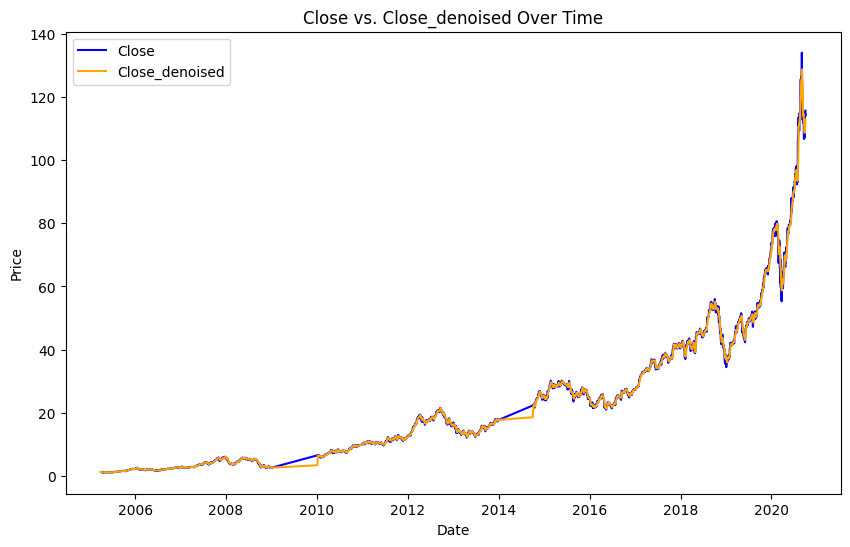

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Convert 'Date' to datetime and sort the DataFrame
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# 2. Create a line plot for 'Close' and 'Close_denoised'
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], color='blue', label='Close')
plt.plot(df['Date'], df['Close_denoised'], color='orange', label='Close_denoised')

# 3. Label and Show
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close vs. Close_denoised Over Time')
plt.legend()
plt.show()


In [54]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# For XGBoost
from xgboost import XGBRegressor

# --- 1) Create the 'Close_in_30_days' column (shift by -30 rows) ---
df['Close_in_30_days'] = df['Close'].shift(-30)

# --- 2) We'll predict 'Close_in_30_days' using 40 lags of 'Close_denoised' + 'quarter' as features ---
cols_needed = ['Close_in_30_days'] + [f'Close_denoised_lag_{i}' for i in range(1, 41)] + ['quarter']
df_model = df[cols_needed].copy()

# --- 3) Drop rows with missing values (removes rows where future target or lag columns are NaN) ---
df_model.dropna(inplace=True)

# --- 4) Define Features (X) and Target (y) ---
X = df_model.drop(columns=['Close_in_30_days'])
y = df_model['Close_in_30_days']

# --- 5) Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# --- 6) Ridge Regression ---
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression:")
print(f"MSE: {mse_ridge:.2f}")
print(f"R2:  {r2_ridge:.2f}")
print("-" * 40)

# --- 7) Lasso Regression ---
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression:")
print(f"MSE: {mse_lasso:.2f}")
print(f"R2:  {r2_lasso:.2f}")
print("-" * 40)

# --- 8) XGBoost Regression ---
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost Regression:")
print(f"MSE: {mse_xgb:.2f}")
print(f"R2:  {r2_xgb:.2f}")
print("-" * 40)


Ridge Regression:
MSE: 15.95
R2:  0.97
----------------------------------------
Lasso Regression:
MSE: 14.74
R2:  0.97
----------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.725e+02, tolerance: 1.374e+02



XGBoost Regression:
MSE: 1.33
R2:  1.00
----------------------------------------


In [61]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For Ridge Regression
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Metrics:")
print("MAE:  {:.2f}".format(mae_ridge))
print("MSE:  {:.2f}".format(mse_ridge))
print("RMSE: {:.2f}".format(rmse_ridge))
print("R²:   {:.2f}".format(r2_ridge))
print("-" * 40)

# For Lasso Regression
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso Regression Metrics:")
print("MAE:  {:.2f}".format(mae_lasso))
print("MSE:  {:.2f}".format(mse_lasso))
print("RMSE: {:.2f}".format(rmse_lasso))
print("R²:   {:.2f}".format(r2_lasso))
print("-" * 40)

# For XGBoost Regression
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Regression Metrics:")
print("MAE:  {:.2f}".format(mae_xgb))
print("MSE:  {:.2f}".format(mse_xgb))
print("RMSE: {:.2f}".format(rmse_xgb))
print("R²:   {:.2f}".format(r2_xgb))
print("-" * 40)


Ridge Regression Metrics:
MAE:  2.17
MSE:  15.95
RMSE: 3.99
R²:   0.97
----------------------------------------
Lasso Regression Metrics:
MAE:  2.13
MSE:  14.74
RMSE: 3.84
R²:   0.97
----------------------------------------
XGBoost Regression Metrics:
MAE:  0.61
MSE:  1.33
RMSE: 1.15
R²:   1.00
----------------------------------------


In [62]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score


# --- 5) TimeSeries Cross-Validation ---
tscv = TimeSeriesSplit(n_splits=5)  # Adjust n_splits as needed

# Function to perform cross-validation and print results
def cross_validate_model(model, X, y, cv):
    scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"{model.__class__.__name__} Cross-Validation:")
    print(f"RMSE Scores: {rmse_scores}")
    print(f"Average RMSE: {rmse_scores.mean():.2f}")
    print(f"Standard Deviation: {rmse_scores.std():.2f}")
    print("-" * 40)


# Perform cross-validation for each model
cross_validate_model(ridge, X, y, tscv)
cross_validate_model(lasso, X, y, tscv)
cross_validate_model(xgb, X, y, tscv)

Ridge Cross-Validation:
RMSE Scores: [1.26405815 1.64700438 2.36413369 2.67243087 9.55193895]
Average RMSE: 3.50
Standard Deviation: 3.07
----------------------------------------
Lasso Cross-Validation:
RMSE Scores: [1.3659974  1.69128744 2.40622149 2.60265906 9.75142758]
Average RMSE: 3.56
Standard Deviation: 3.13
----------------------------------------
XGBRegressor Cross-Validation:
RMSE Scores: [ 2.87998876  6.36448417  8.22357094 11.08326188 27.73011964]
Average RMSE: 11.26
Standard Deviation: 8.66
----------------------------------------
